In [1]:
%matplotlib inline

In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from pathlib import Path

In [3]:
PATH = Path('/home/jupyter/reports')
assert PATH.exists()

In [10]:
!ls -latr {PATH}

total 88
-rw-r--r-- 1 root root 2120 Mar  8 17:59 37_pytorch_fpn_efficientnet_b7_1536_768_shifted_slices_groupkfold_smooth_fold_0
-rw-r--r-- 1 root root 1767 Mar  8 21:17 37_pytorch_fpn_efficientnet_b7_1536_768_shifted_slices_groupkfold_smooth_fold_3
-rw-r--r-- 1 root root 2475 Mar  9 00:03 37_pytorch_fpn_efficientnet_b7_1536_768_shifted_slices_groupkfold_smooth_fold_1
-rw-r--r-- 1 root root 2652 Mar  9 03:04 37_pytorch_fpn_efficientnet_b7_1536_768_shifted_slices_groupkfold_smooth_fold_2
-rw-r--r-- 1 root root 2654 Mar 15 04:37 37_pytorch_fpn_efficientnet_b7_1536_768_shifted_slices_groupkfold_smooth_new_data_fold_1
-rw-r--r-- 1 root root 2669 Mar 15 10:37 37_pytorch_fpn_efficientnet_b7_1536_768_shifted_slices_groupkfold_smooth_new_data_fold_2
-rw-r--r-- 1 root root 2648 Mar 15 16:39 37_pytorch_fpn_efficientnet_b7_1536_768_shifted_slices_groupkfold_smooth_new_data_fold_3
-rw-r--r-- 1 root root 2657 Mar 17 17:56 37_pytorch_fpn_efficientnet_b7_1536_768_shifted_slices_groupkfold_smooth_new

In [33]:
metrics = pd.read_json(PATH/'37_pytorch_fpn_efficientnet_b7_1536_768_shifted_slices_groupkfold_smooth_fold_0')
metrics

,best_loss,dice_coeff_mean,dice_metric_mean,epoch,fold,iou_metric_mean
0,0.167350,0.849760,0.788476,0,0,0.742436
1,0.148481,0.863772,0.808393,1,0,0.763701
2,0.133704,0.866289,0.805083,2,0,0.767691
3,0.133704,0.862092,0.799776,3,0,0.761400
4,0.133704,0.864992,0.809687,4,0,0.766240
5,0.133704,0.859304,0.795694,5,0,0.757968
6,0.133704,0.862340,0.806689,6,0,0.762508
7,0.133704,0.866893,0.809274,7,0,0.769022
8,0.133704,0.864678,0.811764,8,0,0.765629
9,0.133704,0.865724,0.810931,9,0,0.767272


In [5]:
def plot_results(fpn_metrics):
    plt.figure(figsize=(15,5))
    n_e = np.arange(len(fpn_metrics['dice_metric_mean']))
    plt.plot(n_e, fpn_metrics['dice_metric_mean'], '-o', label='Valid dice metric', color='#ff7f0e')
    plt.plot(n_e, fpn_metrics['dice_coeff_mean'],'-o', label='Val dice_coeff', color='#1f77b4')
    plt.plot(n_e, fpn_metrics['iou_metric_mean'],'-o', label='Val dice_coeff', color='#2ca02c')

    def show_max(label = 'dice_metric_mean', col='#ff7f0e'):
        x = np.argmax( fpn_metrics[label] ); y = np.max( fpn_metrics[label] )
        xdist = plt.xlim()[1] - plt.xlim()[0]; ydist = plt.ylim()[1] - plt.ylim()[0]
        plt.scatter(x,y,s=200,color=col); plt.text(x-0.03*xdist,y-0.13*ydist, f'max {label}\n%.2f'%y,size=14)

    show_max('dice_metric_mean', '#ff7f0e')
    show_max('dice_coeff_mean', '#1f77b4')
    show_max('iou_metric_mean', '#2ca02c')

    plt2 = plt.gca().twinx()
    plt2.plot(n_e, fpn_metrics['best_loss'],'-o',label='Val Loss',color='#d62728')

    plt.ylabel('dice_coe',size=14); plt.xlabel('Epoch',size=14)
    plt.legend(loc=2)
    plt2 = plt.gca().twinx()
    plt.legend(loc=3)

/opt/conda/lib/python3.6/site-packages/numpy/core/fromnumeric.py:58: FutureWarning: 
The current behaviour of 'Series.argmax' is deprecated, use 'idxmax'
instead.
The behavior of 'argmax' will be corrected to return the positional
maximum in the future. For now, use 'series.values.argmax' or
'np.argmax(np.array(values))' to get the position of the maximum
row.
  return bound(*args, **kwds)
No handles with labels found to put in legend.


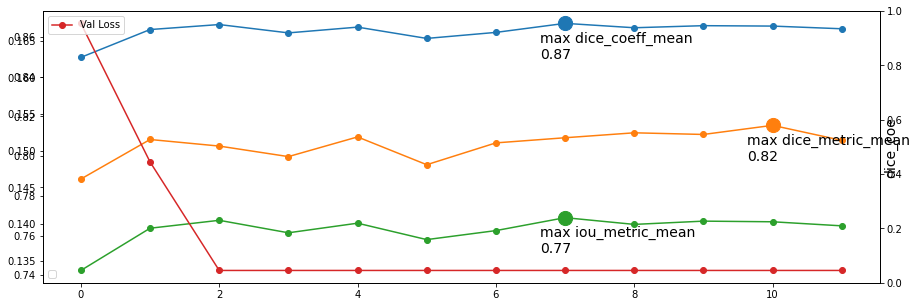

In [34]:
plot_results(metrics)

In [13]:
metrics = pd.read_json(PATH/'37_pytorch_fpn_efficientnet_b7_1536_768_shifted_slices_groupkfold_smooth_new_data_fold_1')
metrics

,best_loss,dice_coeff_mean,dice_metric_mean,epoch,fold,iou_metric_mean
0,0.055380,0.918647,0.879304,0,1,0.850572
1,0.048057,0.936699,0.898338,1,1,0.882070
2,0.042773,0.938389,0.904236,2,1,0.884763
3,0.042427,0.940201,0.904194,3,1,0.888120
4,0.042186,0.942065,0.909899,4,1,0.891366
5,0.042186,0.936530,0.904331,5,1,0.881611
6,0.038939,0.943904,0.910828,6,1,0.894697
7,0.038939,0.944832,0.909203,7,1,0.896347
8,0.038939,0.946077,0.909116,8,1,0.898713
9,0.038939,0.945041,0.913036,9,1,0.896732


/opt/conda/lib/python3.6/site-packages/numpy/core/fromnumeric.py:58: FutureWarning: 
The current behaviour of 'Series.argmax' is deprecated, use 'idxmax'
instead.
The behavior of 'argmax' will be corrected to return the positional
maximum in the future. For now, use 'series.values.argmax' or
'np.argmax(np.array(values))' to get the position of the maximum
row.
  return bound(*args, **kwds)
No handles with labels found to put in legend.


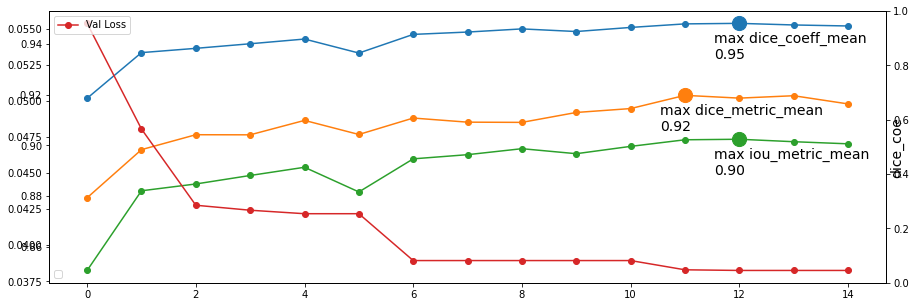

In [14]:
plot_results(metrics)

In [13]:
metrics = pd.read_json(PATH/'39_pytorch_fpn_efficientnet_b7_1536_768_shifted_slices_groupkfold_smooth_new_data_advprop_fold_1')
metrics

,best_loss,dice_coeff_mean,dice_metric_mean,epoch,fold,iou_metric_mean
0,0.048231,0.928541,0.889867,0,1,0.867852
1,0.041623,0.939263,0.899158,1,1,0.886651
2,0.041623,0.938955,0.903881,2,1,0.886162
3,0.041623,0.937891,0.893685,3,1,0.884580
4,0.041623,0.938449,0.895922,4,1,0.885635
5,0.041623,0.940981,0.906495,5,1,0.889970
6,0.040691,0.942175,0.908783,6,1,0.891951
7,0.039296,0.943731,0.913641,7,1,0.894466
8,0.039296,0.943240,0.910996,8,1,0.894070
9,0.039296,0.945411,0.914565,9,1,0.897660


/opt/conda/lib/python3.6/site-packages/numpy/core/fromnumeric.py:58: FutureWarning: 
The current behaviour of 'Series.argmax' is deprecated, use 'idxmax'
instead.
The behavior of 'argmax' will be corrected to return the positional
maximum in the future. For now, use 'series.values.argmax' or
'np.argmax(np.array(values))' to get the position of the maximum
row.
  return bound(*args, **kwds)
No handles with labels found to put in legend.


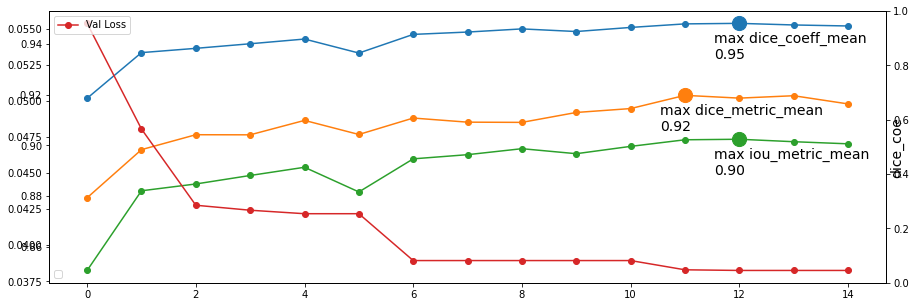

In [14]:
plot_results(metrics)

In [48]:
fpn_metrics = pd.read_json(PATH/'40_pytorch_unet_efficientnet_b7_1536_768_shifted_slices_groupkfold_smooth_new_data_fold_1')
fpn_metrics

,best_loss,dice_coeff_mean,dice_metric_mean,epoch,fold,iou_metric_mean
0,0.049552,0.925822,0.898440,0,1,0.863031
1,0.045392,0.932250,0.898802,1,1,0.874131
2,0.043772,0.940821,0.912431,2,1,0.889251
3,0.043000,0.942527,0.914938,3,1,0.892309
4,0.038595,0.944827,0.915715,4,1,0.896181
5,0.038595,0.944014,0.917234,5,1,0.894923
6,0.038595,0.943853,0.917357,6,1,0.894565
7,0.038595,0.943002,0.915424,7,1,0.893125
8,0.038595,0.943661,0.921046,8,1,0.894213
9,0.037895,0.946822,0.923706,9,1,0.899792


/opt/conda/lib/python3.6/site-packages/numpy/core/fromnumeric.py:58: FutureWarning: 
The current behaviour of 'Series.argmax' is deprecated, use 'idxmax'
instead.
The behavior of 'argmax' will be corrected to return the positional
maximum in the future. For now, use 'series.values.argmax' or
'np.argmax(np.array(values))' to get the position of the maximum
row.
  return bound(*args, **kwds)
No handles with labels found to put in legend.


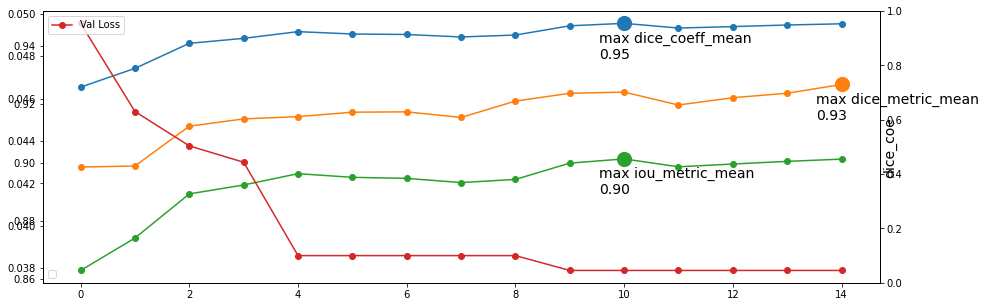

In [49]:
plot_results(fpn_metrics)

In [11]:
fpn_metrics = pd.read_json(PATH/'40_pytorch_linknet_efficientnet_b7_1536_768_shifted_slices_groupkfold_smooth_new_data_fold_1')
fpn_metrics

,best_loss,dice_coeff_mean,dice_metric_mean,epoch,fold,iou_metric_mean
0,0.563094,2.579857e-08,0.000604,0,1,1.289952e-08
1,0.077511,9.222984e-01,0.887441,1,1,8.569452e-01
2,0.043110,9.427026e-01,0.912143,2,1,8.922903e-01
3,0.043110,9.419228e-01,0.912025,3,1,8.909278e-01
4,0.039783,9.453314e-01,0.921607,4,1,8.969192e-01
5,0.039783,9.452576e-01,0.918536,5,1,8.968555e-01
6,0.039783,9.363963e-01,0.902755,6,1,8.814287e-01
7,0.038304,9.473377e-01,0.923909,7,1,9.005414e-01
8,0.038304,9.453612e-01,0.920648,8,1,8.972190e-01
9,0.038304,9.446944e-01,0.918323,9,1,8.959119e-01


/opt/conda/lib/python3.6/site-packages/numpy/core/fromnumeric.py:58: FutureWarning: 
The current behaviour of 'Series.argmax' is deprecated, use 'idxmax'
instead.
The behavior of 'argmax' will be corrected to return the positional
maximum in the future. For now, use 'series.values.argmax' or
'np.argmax(np.array(values))' to get the position of the maximum
row.
  return bound(*args, **kwds)
No handles with labels found to put in legend.


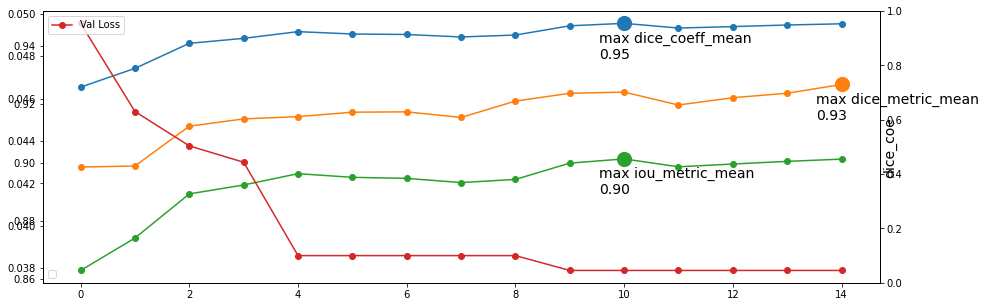

In [49]:
plot_results(fpn_metrics)

In [24]:
metrics = pd.read_json(PATH/'37_pytorch_fpn_efficientnet_b7_1536_768_shifted_slices_groupkfold_smooth_new_data_fold_2')
metrics

,best_loss,dice_coeff_mean,dice_metric_mean,epoch,fold,iou_metric_mean
0,0.049940,0.929660,0.891238,0,2,0.869883
1,0.046508,0.932435,0.894607,1,2,0.874538
2,0.046508,0.935926,0.892301,2,2,0.880842
3,0.046508,0.934765,0.903584,3,2,0.878649
4,0.044800,0.936280,0.902492,4,2,0.881489
5,0.044800,0.938578,0.910189,5,2,0.885473
6,0.042970,0.940421,0.910754,6,2,0.888561
7,0.042970,0.935454,0.902494,7,2,0.880163
8,0.042970,0.941224,0.910839,8,2,0.890068
9,0.042970,0.939407,0.910416,9,2,0.886929


/opt/conda/lib/python3.6/site-packages/numpy/core/fromnumeric.py:58: FutureWarning: 
The current behaviour of 'Series.argmax' is deprecated, use 'idxmax'
instead.
The behavior of 'argmax' will be corrected to return the positional
maximum in the future. For now, use 'series.values.argmax' or
'np.argmax(np.array(values))' to get the position of the maximum
row.
  return bound(*args, **kwds)
No handles with labels found to put in legend.


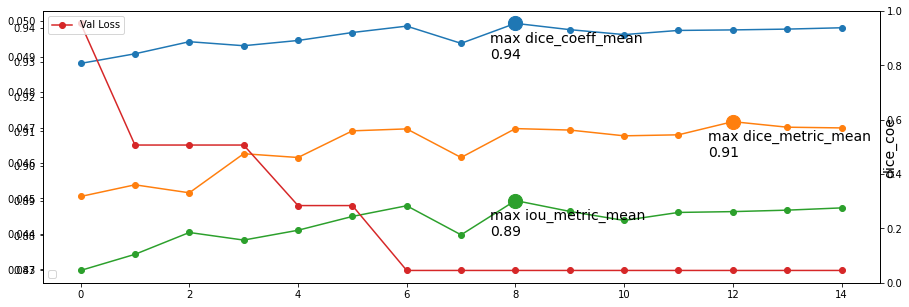

In [25]:
plot_results(metrics)

In [53]:
metrics = pd.read_json(PATH/'40_pytorch_unet_efficientnet_b7_1536_768_shifted_slices_groupkfold_smooth_new_data_fold_2')
metrics

,best_loss,dice_coeff_mean,dice_metric_mean,epoch,fold,iou_metric_mean
0,0.064337,0.900872,0.849958,0,2,0.829456
1,0.061405,0.911374,0.860332,1,2,0.848843
2,0.059634,0.911625,0.864688,2,2,0.848487
3,0.059634,0.905904,0.857951,3,2,0.841625
4,0.059494,0.914739,0.870815,4,2,0.855692
5,0.059494,0.913224,0.867471,5,2,0.852992
6,0.059494,0.913357,0.872570,6,2,0.853415
7,0.059494,0.914013,0.869343,7,2,0.853834
8,0.058360,0.914937,0.871404,8,2,0.855885
9,0.058360,0.914664,0.870132,9,2,0.855874


/opt/conda/lib/python3.6/site-packages/numpy/core/fromnumeric.py:58: FutureWarning: 
The current behaviour of 'Series.argmax' is deprecated, use 'idxmax'
instead.
The behavior of 'argmax' will be corrected to return the positional
maximum in the future. For now, use 'series.values.argmax' or
'np.argmax(np.array(values))' to get the position of the maximum
row.
  return bound(*args, **kwds)
No handles with labels found to put in legend.


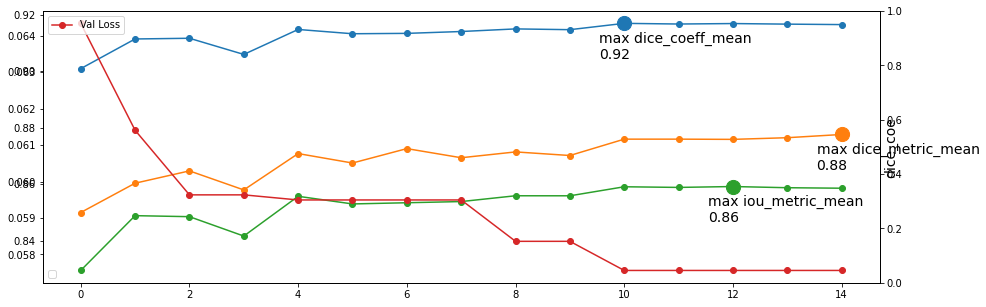

In [54]:
plot_results(metrics)

In [14]:
metrics = pd.read_json(PATH/'39_pytorch_fpn_efficientnet_b7_1536_768_shifted_slices_groupkfold_smooth_new_data_advprop_fold_2')
metrics

,best_loss,dice_coeff_mean,dice_metric_mean,epoch,fold,iou_metric_mean
0,0.056036,0.914712,0.869745,0,2,0.844762
1,0.047855,0.931475,0.896910,1,2,0.873355
2,0.047352,0.935822,0.898193,2,2,0.881077
3,0.047314,0.935621,0.902949,3,2,0.880722
4,0.045998,0.935910,0.906114,4,2,0.881084
5,0.045637,0.937990,0.904282,5,2,0.884667
6,0.045637,0.933964,0.907633,6,2,0.878783
7,0.045253,0.937933,0.905385,7,2,0.884702
8,0.043126,0.940568,0.910992,8,2,0.889305
9,0.043126,0.939430,0.911858,9,2,0.887511


/opt/conda/lib/python3.6/site-packages/numpy/core/fromnumeric.py:58: FutureWarning: 
The current behaviour of 'Series.argmax' is deprecated, use 'idxmax'
instead.
The behavior of 'argmax' will be corrected to return the positional
maximum in the future. For now, use 'series.values.argmax' or
'np.argmax(np.array(values))' to get the position of the maximum
row.
  return bound(*args, **kwds)
No handles with labels found to put in legend.


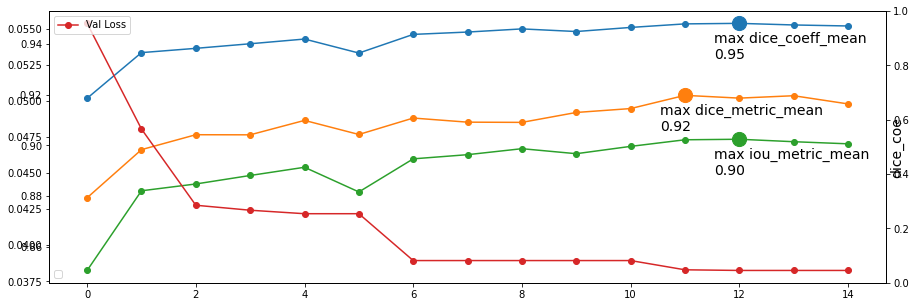

In [14]:
plot_results(metrics)

In [24]:
metrics = pd.read_json(PATH/'37_pytorch_fpn_efficientnet_b7_1536_768_shifted_slices_groupkfold_smooth_new_data_fold_2')
metrics

,best_loss,dice_coeff_mean,dice_metric_mean,epoch,fold,iou_metric_mean
0,0.049940,0.929660,0.891238,0,2,0.869883
1,0.046508,0.932435,0.894607,1,2,0.874538
2,0.046508,0.935926,0.892301,2,2,0.880842
3,0.046508,0.934765,0.903584,3,2,0.878649
4,0.044800,0.936280,0.902492,4,2,0.881489
5,0.044800,0.938578,0.910189,5,2,0.885473
6,0.042970,0.940421,0.910754,6,2,0.888561
7,0.042970,0.935454,0.902494,7,2,0.880163
8,0.042970,0.941224,0.910839,8,2,0.890068
9,0.042970,0.939407,0.910416,9,2,0.886929


/opt/conda/lib/python3.6/site-packages/numpy/core/fromnumeric.py:58: FutureWarning: 
The current behaviour of 'Series.argmax' is deprecated, use 'idxmax'
instead.
The behavior of 'argmax' will be corrected to return the positional
maximum in the future. For now, use 'series.values.argmax' or
'np.argmax(np.array(values))' to get the position of the maximum
row.
  return bound(*args, **kwds)
No handles with labels found to put in legend.


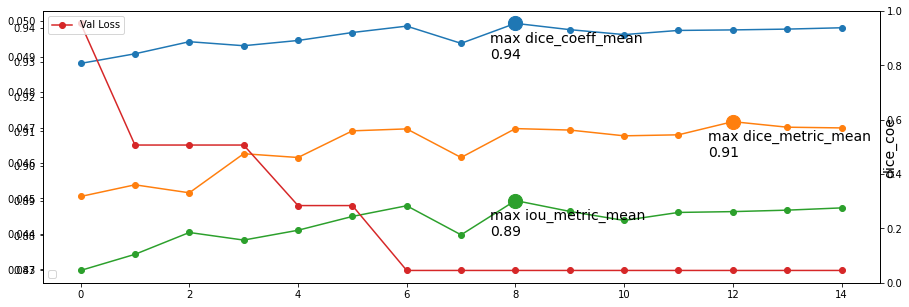

In [25]:
plot_results(metrics)

In [21]:
metrics = pd.read_json(PATH/'37_pytorch_fpn_efficientnet_b7_1536_768_shifted_slices_groupkfold_smooth_new_data_fold_3')
metrics

,best_loss,dice_coeff_mean,dice_metric_mean,epoch,fold,iou_metric_mean
0,0.080496,0.880868,0.808461,0,3,0.801612
1,0.064882,0.905936,0.839628,1,3,0.840048
2,0.064882,0.903040,0.842283,2,3,0.835789
3,0.064882,0.900423,0.837539,3,3,0.832774
4,0.064882,0.903668,0.845387,4,3,0.836503
5,0.064882,0.900690,0.827815,5,3,0.832727
6,0.060495,0.914537,0.862750,6,3,0.852796
7,0.060495,0.907377,0.841732,7,3,0.842505
8,0.060495,0.912759,0.859205,8,3,0.851235
9,0.059076,0.916160,0.863402,9,3,0.856755


/opt/conda/lib/python3.6/site-packages/numpy/core/fromnumeric.py:58: FutureWarning: 
The current behaviour of 'Series.argmax' is deprecated, use 'idxmax'
instead.
The behavior of 'argmax' will be corrected to return the positional
maximum in the future. For now, use 'series.values.argmax' or
'np.argmax(np.array(values))' to get the position of the maximum
row.
  return bound(*args, **kwds)
No handles with labels found to put in legend.


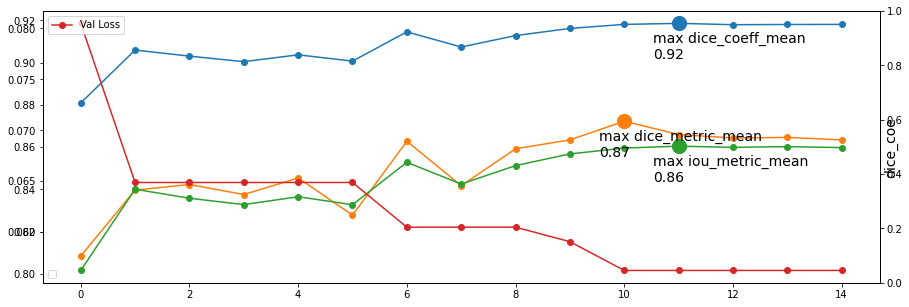

In [59]:
plot_results(metrics)

In [20]:
metrics = pd.read_json(PATH/'39_pytorch_fpn_efficientnet_b7_1536_768_shifted_slices_groupkfold_smooth_new_data_advprop_fold_3')
metrics

,best_loss,dice_coeff_mean,dice_metric_mean,epoch,fold,iou_metric_mean
0,0.080936,0.878206,0.810685,0,3,0.802691
1,0.066757,0.898157,0.837868,1,3,0.833487
2,0.066757,0.891143,0.825213,2,3,0.825342
3,0.066757,0.892911,0.835540,3,3,0.826387
4,0.066757,0.898240,0.836953,4,3,0.834611
5,0.066757,0.901937,0.848993,5,3,0.840668
6,0.066757,0.899851,0.845805,6,3,0.838387
7,0.066757,0.900255,0.847865,7,3,0.838669
8,0.065813,0.905037,0.850879,8,3,0.845778
9,0.064230,0.909196,0.860467,9,3,0.850767


/opt/conda/lib/python3.6/site-packages/numpy/core/fromnumeric.py:58: FutureWarning: 
The current behaviour of 'Series.argmax' is deprecated, use 'idxmax'
instead.
The behavior of 'argmax' will be corrected to return the positional
maximum in the future. For now, use 'series.values.argmax' or
'np.argmax(np.array(values))' to get the position of the maximum
row.
  return bound(*args, **kwds)
No handles with labels found to put in legend.


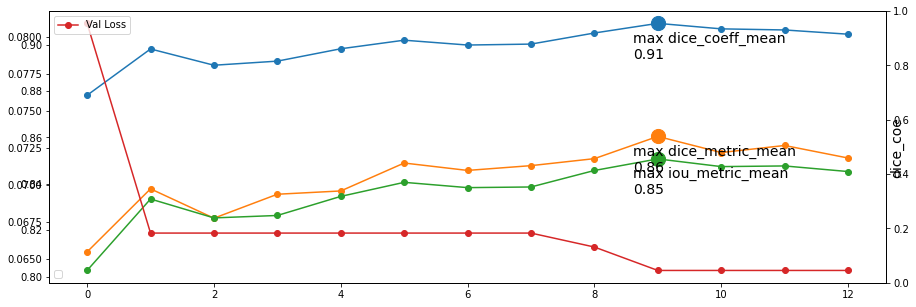

In [18]:
plot_results(metrics)

In [9]:
metrics = pd.read_json(PATH/'37_pytorch_fpn_efficientnet_b7_1536_768_shifted_slices_groupkfold_smooth_new_data_fold_0')
metrics

,best_loss,dice_coeff_mean,dice_metric_mean,epoch,fold,iou_metric_mean
0,0.247229,0.679382,0.599489,0,0,0.525907
1,0.146119,0.826813,0.768361,1,0,0.717860
2,0.070867,0.895391,0.811901,2,0,0.813972
3,0.070867,0.901170,0.835066,3,0,0.823399
4,0.070867,0.887568,0.819109,4,0,0.803500
5,0.053825,0.924586,0.864509,5,0,0.862675
6,0.053825,0.912574,0.823715,6,0,0.843412
7,0.048141,0.930009,0.871614,7,0,0.871498
8,0.046164,0.932110,0.872964,8,0,0.875381
9,0.046164,0.932742,0.879654,9,0,0.876221


/opt/conda/lib/python3.6/site-packages/numpy/core/fromnumeric.py:58: FutureWarning: 
The current behaviour of 'Series.argmax' is deprecated, use 'idxmax'
instead.
The behavior of 'argmax' will be corrected to return the positional
maximum in the future. For now, use 'series.values.argmax' or
'np.argmax(np.array(values))' to get the position of the maximum
row.
  return bound(*args, **kwds)
No handles with labels found to put in legend.


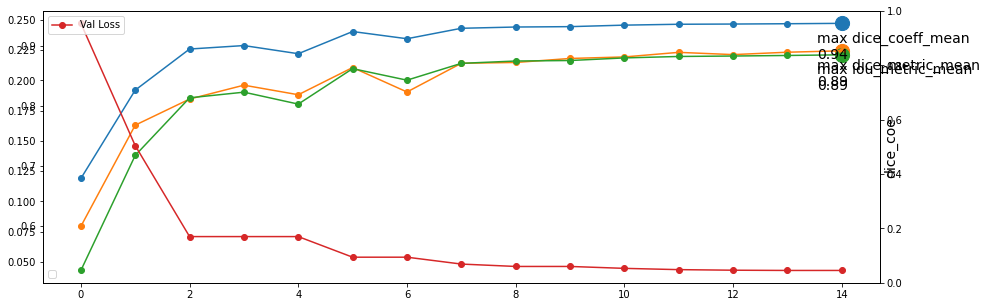

In [12]:
plot_results(metrics)

In [10]:
metrics = pd.read_json(PATH/'37_pytorch_fpn_efficientnet_b7_1536_768_shifted_slices_groupkfold_smooth_new_data_fold_0')
metrics

,best_loss,dice_coeff_mean,dice_metric_mean,epoch,fold,iou_metric_mean
0,0.051496,0.923382,0.868825,0,0,0.859695
1,0.044712,0.935458,0.881357,1,0,0.880588
2,0.044712,0.936277,0.892230,2,0,0.881703
3,0.044712,0.929059,0.880325,3,0,0.869535
4,0.043051,0.937251,0.892119,4,0,0.883946
5,0.043051,0.937307,0.890210,5,0,0.883968
6,0.043051,0.938306,0.886482,6,0,0.885517
7,0.043051,0.939254,0.893549,7,0,0.887019
8,0.042855,0.940037,0.900073,8,0,0.888340
9,0.042855,0.939774,0.900376,9,0,0.887919


/opt/conda/lib/python3.6/site-packages/numpy/core/fromnumeric.py:58: FutureWarning: 
The current behaviour of 'Series.argmax' is deprecated, use 'idxmax'
instead.
The behavior of 'argmax' will be corrected to return the positional
maximum in the future. For now, use 'series.values.argmax' or
'np.argmax(np.array(values))' to get the position of the maximum
row.
  return bound(*args, **kwds)
No handles with labels found to put in legend.


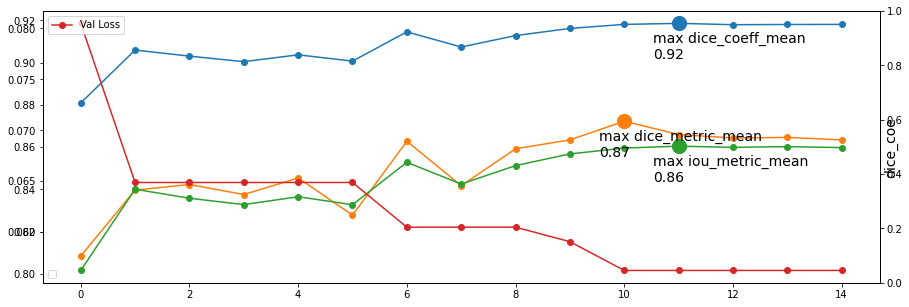

In [60]:
plot_results(metrics)

In [27]:
metrics = pd.read_json(PATH/'39_pytorch_fpn_efficientnet_b7_1536_768_shifted_slices_groupkfold_smooth_new_data_advprop_fold_0')
metrics

,best_loss,dice_coeff_mean,dice_metric_mean,epoch,fold,iou_metric_mean
0,0.049091,0.928467,0.871291,0,0,0.869097
1,0.045820,0.934263,0.882586,1,0,0.878663
2,0.045820,0.928487,0.865141,2,0,0.869599
3,0.044773,0.935921,0.890934,3,0,0.881940
4,0.043227,0.936453,0.886760,4,0,0.883264
5,0.043227,0.936641,0.888933,5,0,0.883830
6,0.043101,0.936155,0.890359,6,0,0.883026
7,0.041626,0.938123,0.896868,7,0,0.886084
8,0.041626,0.937481,0.893567,8,0,0.885193
9,0.041626,0.939353,0.896959,9,0,0.888351


/opt/conda/lib/python3.6/site-packages/numpy/core/fromnumeric.py:58: FutureWarning: 
The current behaviour of 'Series.argmax' is deprecated, use 'idxmax'
instead.
The behavior of 'argmax' will be corrected to return the positional
maximum in the future. For now, use 'series.values.argmax' or
'np.argmax(np.array(values))' to get the position of the maximum
row.
  return bound(*args, **kwds)
No handles with labels found to put in legend.


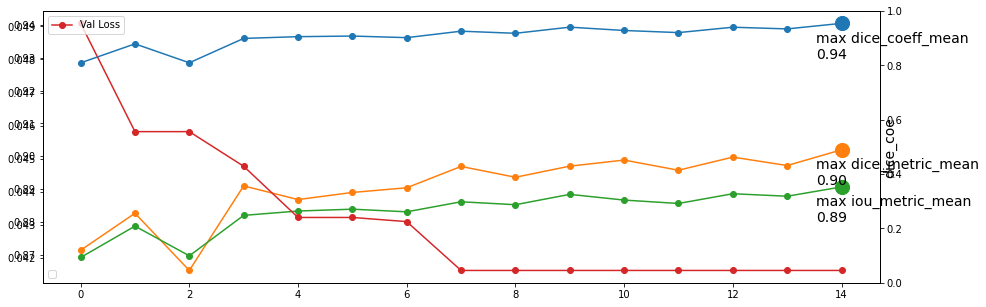

In [28]:
plot_results(metrics)

In [82]:
metrics = pd.read_json(PATH/'40_pytorch_unet_efficientnet_b7_1536_768_shifted_slices_groupkfold_smooth_new_data_fold_0')
metrics

,best_loss,dice_coeff_mean,dice_metric_mean,epoch,fold,iou_metric_mean
0,0.104608,0.898932,0.827768,0,0,0.818145
1,0.048798,0.933420,0.880684,1,0,0.876792
2,0.048798,0.932362,0.871138,2,0,0.874827
3,0.045995,0.937610,0.886056,3,0,0.884305
4,0.045995,0.933982,0.892407,4,0,0.877424
5,0.045995,0.936446,0.888114,5,0,0.882753
6,0.045758,0.936685,0.889335,6,0,0.882842
7,0.045264,0.935247,0.887905,7,0,0.880239
8,0.043460,0.939144,0.894419,8,0,0.886970
9,0.042194,0.940913,0.893170,9,0,0.889573


/opt/conda/lib/python3.6/site-packages/numpy/core/fromnumeric.py:58: FutureWarning: 
The current behaviour of 'Series.argmax' is deprecated, use 'idxmax'
instead.
The behavior of 'argmax' will be corrected to return the positional
maximum in the future. For now, use 'series.values.argmax' or
'np.argmax(np.array(values))' to get the position of the maximum
row.
  return bound(*args, **kwds)
No handles with labels found to put in legend.


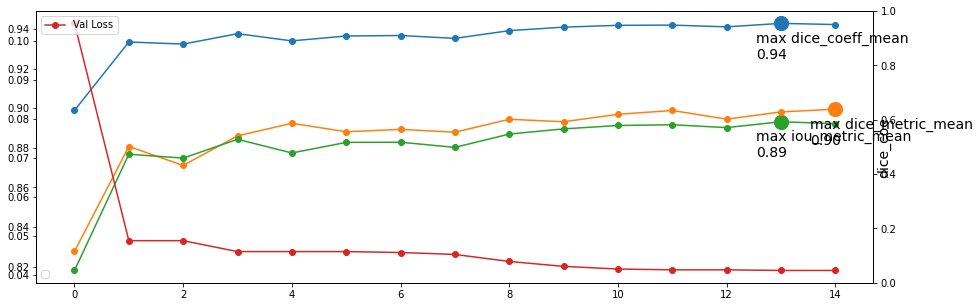

In [83]:
plot_results(metrics)

In [11]:
metrics = pd.read_json(PATH/'40_pytorch_unet_efficientnet_b7_1536_768_shifted_slices_groupkfold_smooth_new_data_fold_0')
metrics

,best_loss,dice_coeff_mean,dice_metric_mean,epoch,fold,iou_metric_mean
0,0.123572,0.894088,0.819655,0,0,0.810370
1,0.049898,0.931119,0.873629,1,0,0.872734
2,0.047070,0.933331,0.880180,2,0,0.876473
3,0.047070,0.934060,0.888239,3,0,0.878016
4,0.046139,0.934206,0.885406,4,0,0.878634
5,0.046139,0.926444,0.874050,5,0,0.866030
6,0.042407,0.940556,0.895902,6,0,0.889129
7,0.042407,0.940338,0.894098,7,0,0.888769
8,0.042407,0.937249,0.890358,8,0,0.883423
9,0.042407,0.940389,0.896585,9,0,0.888950


/opt/conda/lib/python3.6/site-packages/numpy/core/fromnumeric.py:58: FutureWarning: 
The current behaviour of 'Series.argmax' is deprecated, use 'idxmax'
instead.
The behavior of 'argmax' will be corrected to return the positional
maximum in the future. For now, use 'series.values.argmax' or
'np.argmax(np.array(values))' to get the position of the maximum
row.
  return bound(*args, **kwds)
No handles with labels found to put in legend.


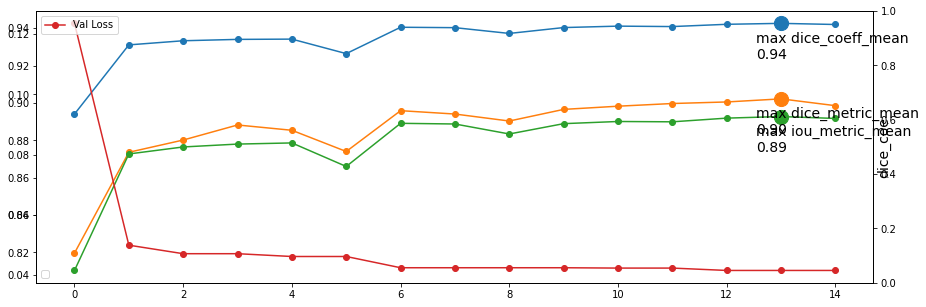

In [12]:
plot_results(metrics)

In [45]:
metrics = pd.read_json(PATH/'40_pytorch_unet_efficientnet_b7_1536_768_shifted_slices_groupkfold_smooth_new_data_fold_0')
metrics

,best_loss,dice_coeff_mean,dice_metric_mean,epoch,fold,iou_metric_mean
0,0.049262,0.930622,0.878129,0,0,0.871458
1,0.045274,0.935725,0.889839,1,0,0.880422
2,0.045274,0.934779,0.882679,2,0,0.878854
3,0.045274,0.936332,0.891825,3,0,0.881634
4,0.045274,0.936739,0.883164,4,0,0.882447
5,0.043993,0.937663,0.901076,5,0,0.884230
6,0.043993,0.938390,0.892298,6,0,0.885603
7,0.043436,0.937827,0.891821,7,0,0.884422
8,0.043436,0.936023,0.886272,8,0,0.881496
9,0.042555,0.939803,0.897667,9,0,0.887987


/opt/conda/lib/python3.6/site-packages/numpy/core/fromnumeric.py:58: FutureWarning: 
The current behaviour of 'Series.argmax' is deprecated, use 'idxmax'
instead.
The behavior of 'argmax' will be corrected to return the positional
maximum in the future. For now, use 'series.values.argmax' or
'np.argmax(np.array(values))' to get the position of the maximum
row.
  return bound(*args, **kwds)
No handles with labels found to put in legend.


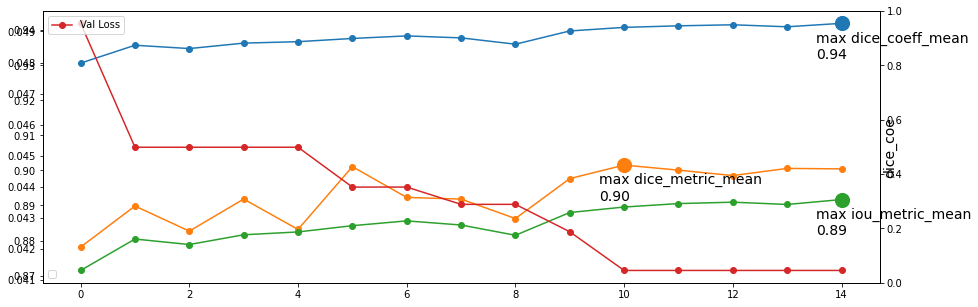

In [46]:
plot_results(metrics)

In [6]:
metrics = pd.read_json(PATH/'40_pytorch_linknet_efficientnet_b7_1536_768_shifted_slices_groupkfold_smooth_new_data_fold_0')
metrics

,best_loss,dice_coeff_mean,dice_metric_mean,epoch,fold,iou_metric_mean
0,0.526365,0.019902,0.103155,0,0,0.010063
1,0.089524,0.894267,0.832080,1,0,0.811940
2,0.049222,0.932965,0.887767,2,0,0.875443
3,0.046654,0.936117,0.889759,3,0,0.881037
4,0.045022,0.937161,0.891442,4,0,0.882850
5,0.045022,0.933090,0.888807,5,0,0.876235
6,0.045022,0.934340,0.883589,6,0,0.878174
7,0.043085,0.940310,0.896279,7,0,0.888381
8,0.042512,0.940342,0.897392,8,0,0.888576
9,0.041278,0.943135,0.902777,9,0,0.893341


/opt/conda/lib/python3.6/site-packages/numpy/core/fromnumeric.py:58: FutureWarning: 
The current behaviour of 'Series.argmax' is deprecated, use 'idxmax'
instead.
The behavior of 'argmax' will be corrected to return the positional
maximum in the future. For now, use 'series.values.argmax' or
'np.argmax(np.array(values))' to get the position of the maximum
row.
  return bound(*args, **kwds)
No handles with labels found to put in legend.


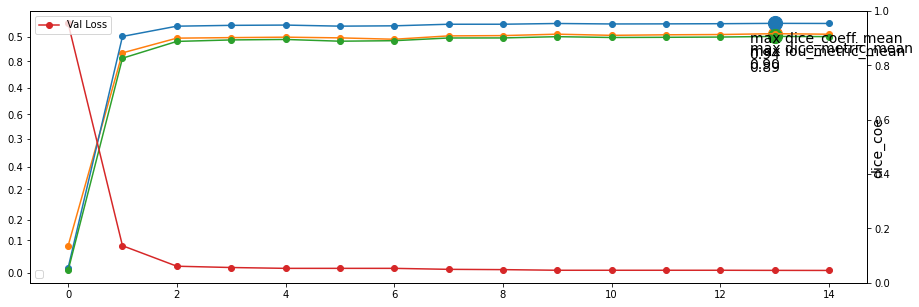

In [7]:
plot_results(metrics)

In [9]:
metrics = pd.read_json(PATH/'40_pytorch_linknet_efficientnet_b7_1536_768_shifted_slices_groupkfold_smooth_new_data_fold_0')
metrics

,best_loss,dice_coeff_mean,dice_metric_mean,epoch,fold,iou_metric_mean
0,0.527335,0.038336,0.125685,0,0,0.019572
1,0.070352,0.924408,0.866122,1,0,0.860309
2,0.045715,0.938567,0.885441,2,0,0.884892
3,0.045715,0.932389,0.867754,3,0,0.874427
4,0.045270,0.937761,0.883232,4,0,0.883645
5,0.041178,0.942505,0.893955,5,0,0.892014
6,0.041178,0.941341,0.894179,6,0,0.890028
7,0.041178,0.941095,0.889221,7,0,0.889630
8,0.041178,0.939843,0.889344,8,0,0.887525
9,0.041178,0.940901,0.889430,9,0,0.889409


/opt/conda/lib/python3.6/site-packages/numpy/core/fromnumeric.py:58: FutureWarning: 
The current behaviour of 'Series.argmax' is deprecated, use 'idxmax'
instead.
The behavior of 'argmax' will be corrected to return the positional
maximum in the future. For now, use 'series.values.argmax' or
'np.argmax(np.array(values))' to get the position of the maximum
row.
  return bound(*args, **kwds)
No handles with labels found to put in legend.


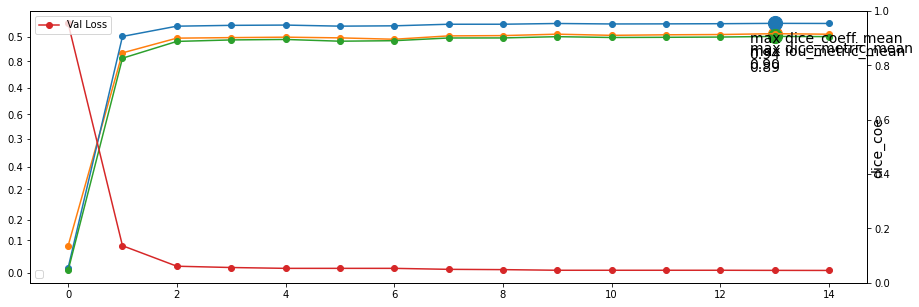

In [7]:
plot_results(metrics)

In [37]:
metrics = pd.read_json(PATH/'37_pytorch_fpn_efficientnet_b7_1536_768_shifted_slices_groupkfold_smooth_fold_2')
metrics

,best_loss,dice_coeff_mean,dice_metric_mean,epoch,fold,iou_metric_mean
0,0.085555,0.884062,0.807881,0,2,0.795580
1,0.073067,0.897658,0.829722,1,2,0.817603
2,0.067100,0.906778,0.847138,2,2,0.832433
3,0.064367,0.906917,0.844720,3,2,0.832423
4,0.064367,0.908008,0.845425,4,2,0.834315
5,0.064367,0.904365,0.834206,5,2,0.829275
6,0.064367,0.910069,0.850233,6,2,0.837801
7,0.063726,0.911616,0.855496,7,2,0.840457
8,0.063726,0.909483,0.847776,8,2,0.836768
9,0.063512,0.912081,0.854065,9,2,0.841185


/opt/conda/lib/python3.6/site-packages/numpy/core/fromnumeric.py:58: FutureWarning: 
The current behaviour of 'Series.argmax' is deprecated, use 'idxmax'
instead.
The behavior of 'argmax' will be corrected to return the positional
maximum in the future. For now, use 'series.values.argmax' or
'np.argmax(np.array(values))' to get the position of the maximum
row.
  return bound(*args, **kwds)
No handles with labels found to put in legend.


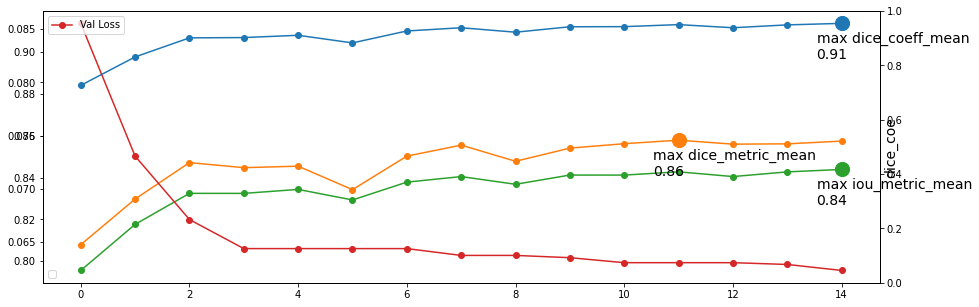

In [38]:
plot_results(metrics)

In [32]:
fpn_metrics = pd.read_json(PATH/'37_pytorch_fpn_efficientnet_b7_1536_768_shifted_slices_groupkfold_smooth_fold_3')
fpn_metrics

,best_loss,dice_coeff_mean,dice_metric_mean,epoch,fold,iou_metric_mean
0,0.124031,0.834967,0.777220,0,3,0.719476
1,0.089458,0.868849,0.819928,1,3,0.770265
2,0.089458,0.854057,0.801460,2,3,0.747810
3,0.089458,0.873186,0.821353,3,3,0.777326
4,0.086696,0.873921,0.828061,4,3,0.778358
5,0.086696,0.871337,0.817688,5,3,0.774377
6,0.086696,0.858490,0.804930,6,3,0.755563
7,0.086696,0.868069,0.815259,7,3,0.769240
8,0.086696,0.870115,0.823797,8,3,0.772214
9,0.086696,0.866901,0.812964,9,3,0.768125


/opt/conda/lib/python3.6/site-packages/numpy/core/fromnumeric.py:58: FutureWarning: 
The current behaviour of 'Series.argmax' is deprecated, use 'idxmax'
instead.
The behavior of 'argmax' will be corrected to return the positional
maximum in the future. For now, use 'series.values.argmax' or
'np.argmax(np.array(values))' to get the position of the maximum
row.
  return bound(*args, **kwds)
No handles with labels found to put in legend.


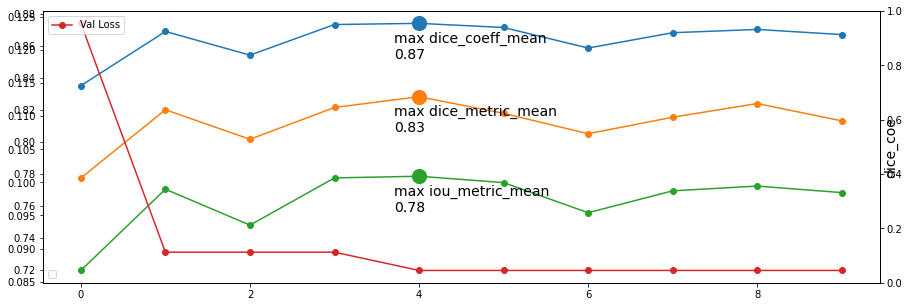

In [33]:
plot_results(fpn_metrics)

In [30]:
fpn_metrics = pd.read_json(PATH/'37_pytorch_fpn_efficientnet_b7_1536_768_shifted_slices_groupkfold_smooth_fold_1')
fpn_metrics

,best_loss,dice_coeff_mean,dice_metric_mean,epoch,fold,iou_metric_mean
0,0.095103,0.873426,0.806380,0,1,0.776671
1,0.071287,0.885461,0.842351,1,1,0.795497
2,0.066989,0.894087,0.831862,2,1,0.810881
3,0.061204,0.910691,0.861018,3,1,0.838211
4,0.060607,0.915749,0.858596,4,1,0.846726
5,0.060607,0.908093,0.849962,5,1,0.833401
6,0.060607,0.912665,0.850535,6,1,0.841521
7,0.056299,0.923153,0.868778,7,1,0.859219
8,0.054152,0.920897,0.874655,8,1,0.855225
9,0.054152,0.914135,0.869692,9,1,0.843578


/opt/conda/lib/python3.6/site-packages/numpy/core/fromnumeric.py:58: FutureWarning: 
The current behaviour of 'Series.argmax' is deprecated, use 'idxmax'
instead.
The behavior of 'argmax' will be corrected to return the positional
maximum in the future. For now, use 'series.values.argmax' or
'np.argmax(np.array(values))' to get the position of the maximum
row.
  return bound(*args, **kwds)
No handles with labels found to put in legend.


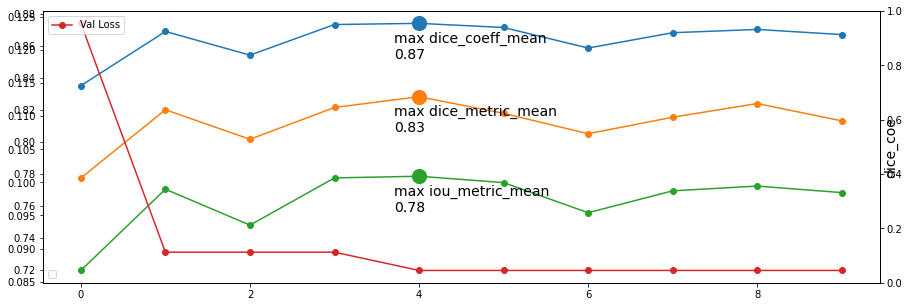

In [33]:
plot_results(fpn_metrics)

In [37]:
fpn_metrics = pd.read_json(PATH/'32_pytorch_fpn_efficientnet_b6_1024_2shifted_slices_groupkfold_fastai_fold_2')
fpn_metrics

,fold,epoch,best_loss,dice_metric_mean,dice_coeff_mean,iou_metric_mean
0,2,0,0.143776,0.725918,0.858041,0.754658
1,2,1,0.119002,0.776439,0.880735,0.789568
2,2,2,0.111655,0.775261,0.888672,0.802322
3,2,3,0.106297,0.790037,0.893650,0.810596
4,2,4,0.099906,0.804799,0.900319,0.821029
5,2,5,0.099906,0.790931,0.897949,0.817541
6,2,6,0.098356,0.807006,0.901721,0.823598
7,2,7,0.098356,0.804897,0.900045,0.820570
8,2,8,0.096483,0.817494,0.903516,0.826105
9,2,9,0.096483,0.801326,0.902721,0.825213


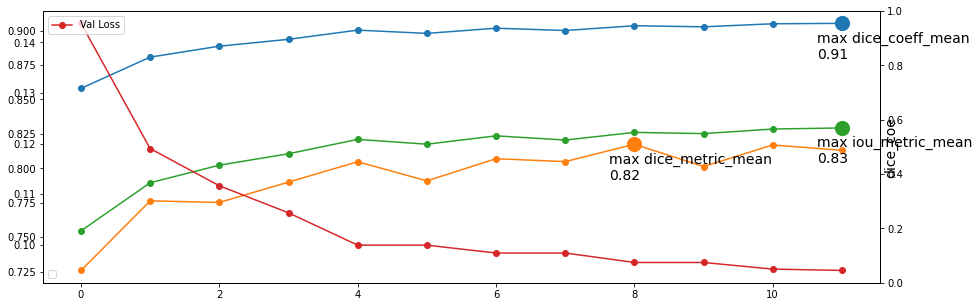

In [39]:
plot_results(fpn_metrics)

In [40]:
fpn_metrics = pd.read_json(PATH/'32_pytorch_fpn_efficientnet_b6_1024_2shifted_slices_groupkfold_fastai_fold_3')
fpn_metrics

,fold,epoch,best_loss,dice_metric_mean,dice_coeff_mean,iou_metric_mean
0,3,0,0.182357,0.697287,0.817979,0.695651
1,3,1,0.145079,0.738594,0.855179,0.750070
2,3,2,0.145079,0.727214,0.837097,0.723471
3,3,3,0.137694,0.761050,0.862678,0.761550
4,3,4,0.135145,0.764217,0.865212,0.766010
5,3,5,0.135145,0.739173,0.855099,0.750678
6,3,6,0.135145,0.740554,0.849257,0.742016
7,3,7,0.135145,0.757381,0.860941,0.759072
8,3,8,0.131742,0.773825,0.868208,0.770657
9,3,9,0.131742,0.757351,0.862989,0.762354


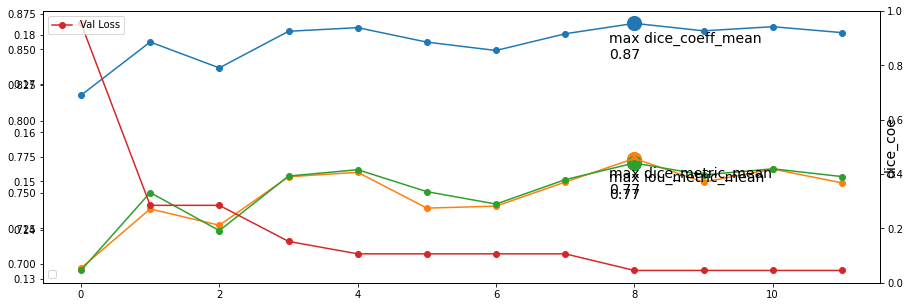

In [41]:
plot_results(fpn_metrics)

In [25]:
fpn_metrics = pd.read_json(PATH/'34_pytorch_unet_efficientnet_b6_1024_768_shifted_slices_groupkfold_fold_0')
fpn_metrics

,fold,epoch,best_loss,dice_metric_mean,dice_coeff_mean,iou_metric_mean
0,0,0,0.486478,0.722083,0.827128,0.708993
1,0,1,0.237589,0.757472,0.864779,0.765194
2,0,2,0.230436,0.771121,0.867479,0.769753
3,0,3,0.230436,0.784201,0.864361,0.764730
4,0,4,0.230436,0.778043,0.866974,0.768934
5,0,5,0.225811,0.785608,0.870554,0.774181
6,0,6,0.223641,0.780980,0.872064,0.776300
7,0,7,0.222317,0.783960,0.872928,0.777628
8,0,8,0.222317,0.786354,0.871115,0.775201
9,0,9,0.222317,0.787425,0.870253,0.773790


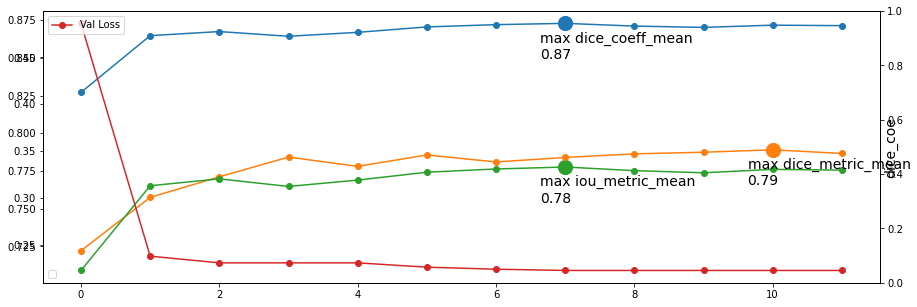

In [26]:
plot_results(fpn_metrics)

In [61]:
fpn_metrics = pd.read_json(PATH/'34_pytorch_unet_efficientnet_b6_1024_768_shifted_slices_groupkfold_fold_0')
fpn_metrics

,fold,epoch,best_loss,dice_metric_mean,dice_coeff_mean,iou_metric_mean
0,0,0,0.284772,0.747139,0.847885,0.744323
1,0,1,0.239833,0.768918,0.858837,0.760449
2,0,2,0.237779,0.759276,0.859732,0.762265
3,0,3,0.233206,0.773328,0.863285,0.766730
4,0,4,0.233206,0.761627,0.856971,0.758321
5,0,5,0.231698,0.773327,0.863465,0.768293
6,0,6,0.222866,0.788795,0.869899,0.777094
7,0,7,0.222866,0.789253,0.865699,0.770629
8,0,8,0.222866,0.785621,0.866957,0.772652
9,0,9,0.222866,0.786633,0.865776,0.771381


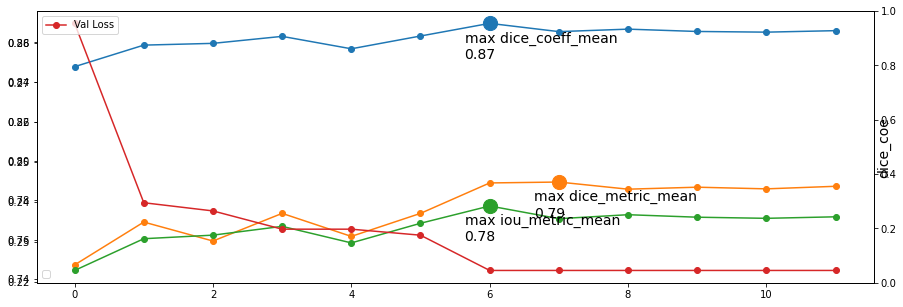

In [62]:
plot_results(fpn_metrics)

In [79]:
fpn_metrics = pd.read_json(PATH/'34_pytorch_unet_efficientnet_b6_1536_768_shifted_slices_groupkfold_fold_0')
fpn_metrics

,fold,epoch,best_loss,dice_metric_mean,dice_coeff_mean,iou_metric_mean
0,0,0,0.400516,0.762793,0.822367,0.704498
1,0,1,0.248723,0.801535,0.855325,0.753965
2,0,2,0.246976,0.800643,0.854741,0.753244
3,0,3,0.246243,0.796880,0.855024,0.753701
4,0,4,0.242071,0.792976,0.857448,0.757922
5,0,5,0.242071,0.806176,0.855593,0.753393
6,0,6,0.235700,0.809802,0.862715,0.764329
7,0,7,0.233400,0.807865,0.864022,0.766555
8,0,8,0.233400,0.814818,0.863477,0.766538
9,0,9,0.231095,0.812590,0.865681,0.768859


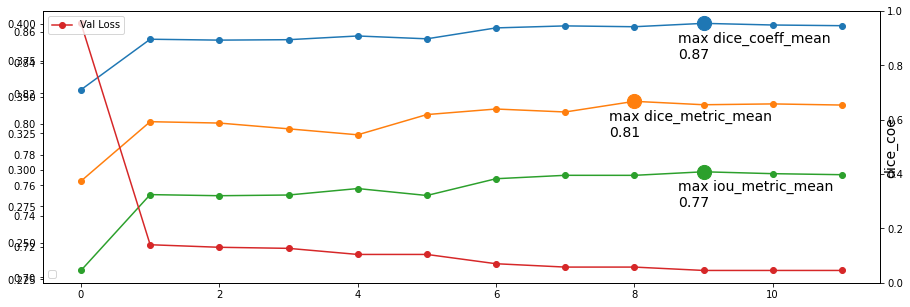

In [80]:
plot_results(fpn_metrics)

In [106]:
metrics = pd.read_json(PATH/'34_pytorch_unet_efficientnet_b6_1536_768_shifted_slices_groupkfold_fold_1')
metrics

,fold,epoch,best_loss,dice_metric_mean,dice_coeff_mean,iou_metric_mean
0,1,0,0.379282,0.803307,0.863292,0.762270
1,1,1,0.165439,0.859927,0.910142,0.838424
2,1,2,0.150487,0.867468,0.917157,0.850269
3,1,3,0.150487,0.854770,0.903134,0.826749
4,1,4,0.150487,0.853530,0.893712,0.813625
5,1,5,0.150487,0.867586,0.914596,0.847370
6,1,6,0.144599,0.869185,0.919894,0.855301
7,1,7,0.143437,0.878319,0.920166,0.856667
8,1,8,0.138292,0.873948,0.923313,0.861917
9,1,9,0.138292,0.875601,0.922613,0.860734


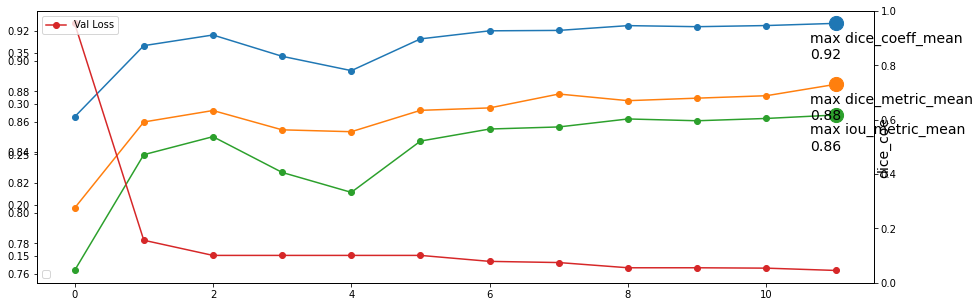

In [107]:
plot_results(metrics)

In [139]:
metrics = pd.read_json(PATH/'34_pytorch_unet_efficientnet_b6_1536_768_shifted_slices_groupkfold_fold_2')
metrics

,fold,epoch,best_loss,dice_metric_mean,dice_coeff_mean,iou_metric_mean
0,2,0,0.391490,0.779035,0.857760,0.756689
1,2,1,0.201493,0.816872,0.887128,0.802605
2,2,2,0.191500,0.824617,0.890050,0.809671
3,2,3,0.191500,0.796749,0.871553,0.784648
4,2,4,0.174691,0.839832,0.901283,0.825784
5,2,5,0.162381,0.848669,0.908561,0.837814
6,2,6,0.162381,0.833795,0.901575,0.828168
7,2,7,0.162381,0.852859,0.898674,0.827603
8,2,8,0.159668,0.853195,0.910201,0.840622
9,2,9,0.157678,0.853320,0.911321,0.842537


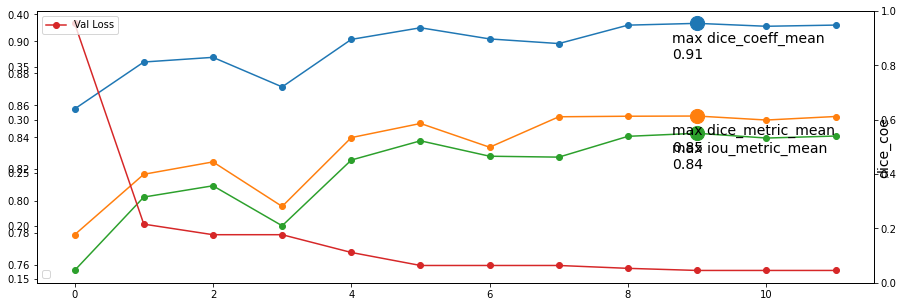

In [140]:
plot_results(metrics)

In [142]:
metrics = pd.read_json(PATH/'34_pytorch_unet_efficientnet_b6_1536_768_shifted_slices_groupkfold_fold_3')
metrics

,fold,epoch,best_loss,dice_metric_mean,dice_coeff_mean,iou_metric_mean
0,3,0,0.410593,0.778401,0.833517,0.718623
1,3,1,0.246552,0.792659,0.858531,0.756844
2,3,2,0.237284,0.822793,0.863588,0.763853
3,3,3,0.228926,0.812843,0.868079,0.771032
4,3,4,0.228926,0.758394,0.818236,0.704361
5,3,5,0.228926,0.807151,0.862808,0.765107
6,3,6,0.218016,0.826671,0.875435,0.781865
7,3,7,0.210089,0.835124,0.880374,0.789829
8,3,8,0.210089,0.825878,0.877346,0.785253
9,3,9,0.210089,0.834240,0.877851,0.786087


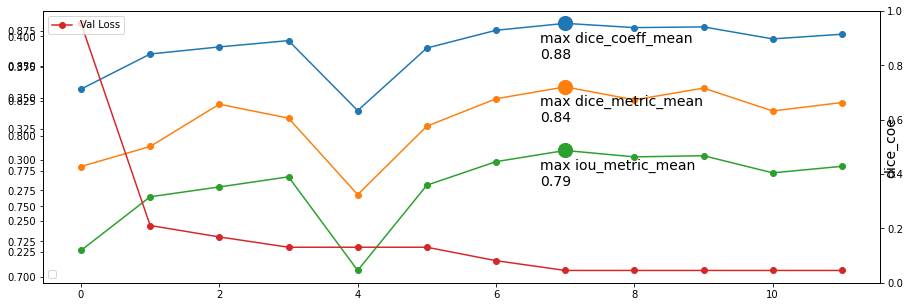

In [143]:
plot_results(metrics)

In [9]:
metrics = pd.read_json(PATH/'35_pytorch_unet_efficientnet_b6_1536_768_shifted_slices_groupkfold_aux_params_fold_0')
metrics

,fold,epoch,best_loss,dice_metric_mean,dice_coeff_mean,iou_metric_mean
0,0,0,0.264972,0.763363,0.823428,0.705287
1,0,1,0.154442,0.796030,0.848775,0.743937
2,0,2,0.154442,0.787297,0.839141,0.729650
3,0,3,0.149586,0.801226,0.850844,0.746713
4,0,4,0.149586,0.800677,0.849203,0.743796
5,0,5,0.146896,0.801351,0.853407,0.750145
6,0,6,0.146896,0.804808,0.851710,0.747112
7,0,7,0.146896,0.796250,0.852222,0.749327
8,0,8,0.144205,0.808866,0.855989,0.755068
9,0,9,0.144205,0.808908,0.854479,0.752535


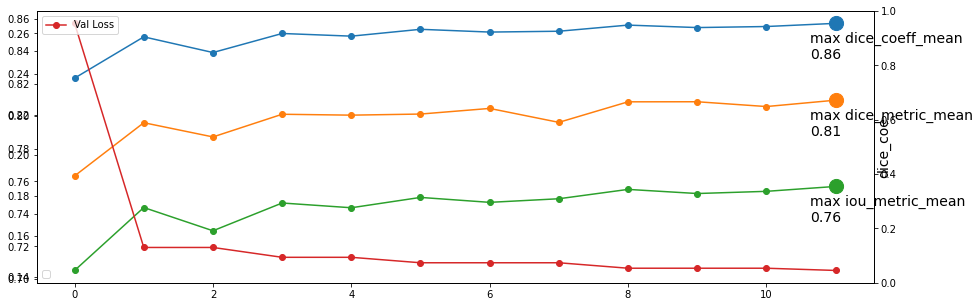

In [10]:
plot_results(metrics)

In [11]:
metrics = pd.read_json(PATH/'35_pytorch_unet_efficientnet_b6_1536_768_shifted_slices_groupkfold_aux_params_fold_1')
metrics

,fold,epoch,best_loss,dice_metric_mean,dice_coeff_mean,iou_metric_mean
0,1,0,0.433930,0.703549,0.764373,0.627990
1,1,1,0.120661,0.835118,0.885194,0.796966
2,1,2,0.109203,0.844763,0.892246,0.807403
3,1,3,0.109203,0.819946,0.853945,0.752740
4,1,4,0.092090,0.863050,0.908519,0.834692
5,1,5,0.092090,0.851347,0.902355,0.824828
6,1,6,0.086682,0.869188,0.913765,0.843602
7,1,7,0.086682,0.868464,0.912546,0.842531
8,1,8,0.086682,0.871074,0.910283,0.837833
9,1,9,0.084105,0.871040,0.916295,0.848391


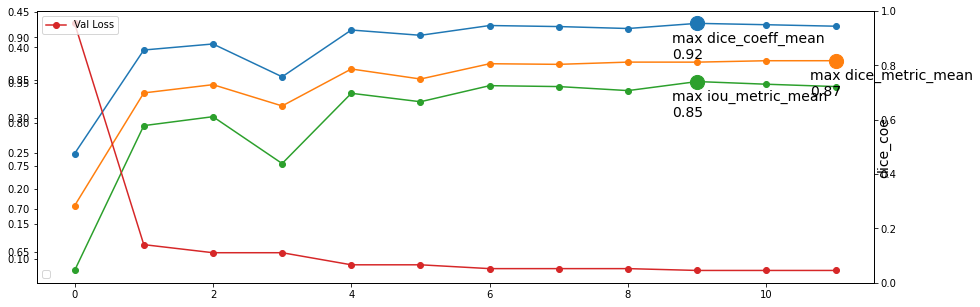

In [12]:
plot_results(metrics)

In [81]:
metrics = pd.read_json(PATH/'35_pytorch_unet_efficientnet_b6_1536_768_shifted_slices_groupkfold_aux_params_fold_2')
metrics

,fold,epoch,best_loss,dice_metric_mean,dice_coeff_mean,iou_metric_mean
0,2,0,0.415765,0.697995,0.773163,0.637979
1,2,1,0.142609,0.806285,0.862986,0.766242
2,2,2,0.112940,0.830332,0.888387,0.805395
3,2,3,0.112940,0.821905,0.877042,0.786931
4,2,4,0.112940,0.820228,0.881701,0.793503
5,2,5,0.112940,0.815274,0.868052,0.772161
6,2,6,0.112940,0.818446,0.874835,0.785337
7,2,7,0.112940,0.818460,0.878548,0.788839


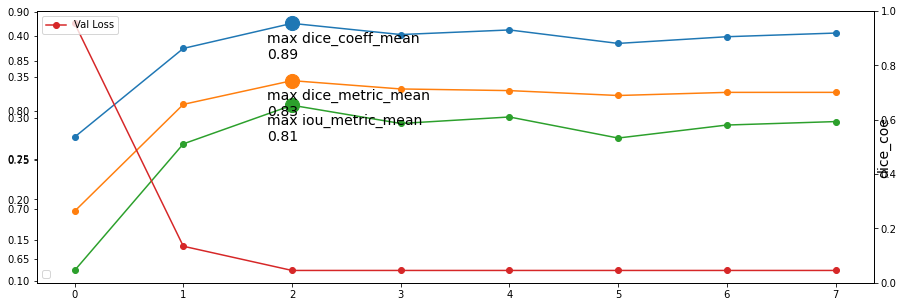

In [82]:
plot_results(metrics)

In [91]:
metrics = pd.read_json(PATH/'35_pytorch_unet_efficientnet_b6_1536_768_shifted_slices_groupkfold_aux_params_fold_3')
metrics

,fold,epoch,best_loss,dice_metric_mean,dice_coeff_mean,iou_metric_mean
0,3,0,0.319014,0.746817,0.802321,0.673987
1,3,1,0.165646,0.793990,0.840372,0.728386
2,3,2,0.144732,0.813521,0.856809,0.753197
3,3,3,0.135033,0.825390,0.865549,0.766197
4,3,4,0.135033,0.813508,0.862302,0.761820
5,3,5,0.135033,0.818545,0.859112,0.755997
6,3,6,0.135033,0.815699,0.864601,0.764681
7,3,7,0.135033,0.814206,0.858865,0.755915
8,3,8,0.135033,0.816248,0.863853,0.764387


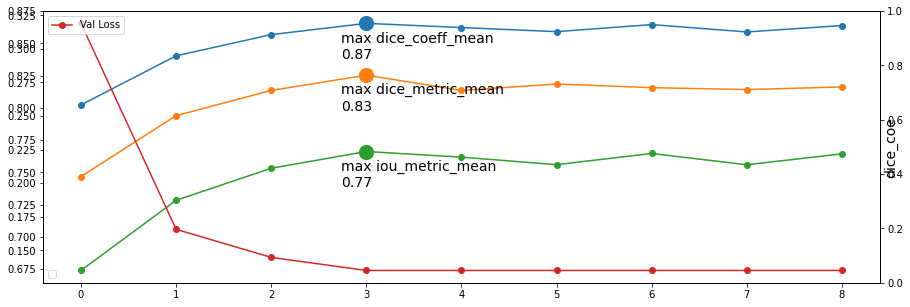

In [92]:
plot_results(metrics)

In [99]:
metrics = pd.read_json(PATH/'36_pytorch_fpn_efficientnet_b6_1536_768_shifted_slices_groupkfold_smooth_fold_0')
metrics

,fold,epoch,best_loss,dice_metric_mean,dice_coeff_mean,iou_metric_mean
0,0,0,0.150867,0.782195,0.836220,0.724236
1,0,1,0.140785,0.797737,0.855911,0.754286
2,0,2,0.131314,0.806064,0.860113,0.761269
3,0,3,0.131314,0.802428,0.856200,0.756605
4,0,4,0.131314,0.804092,0.856995,0.756811
5,0,5,0.131314,0.810225,0.861102,0.763161
6,0,6,0.131314,0.811973,0.859545,0.760570
7,0,7,0.131314,0.812687,0.861702,0.763902
8,0,8,0.131314,0.806874,0.860701,0.762959
9,0,9,0.131314,0.806172,0.858987,0.760667


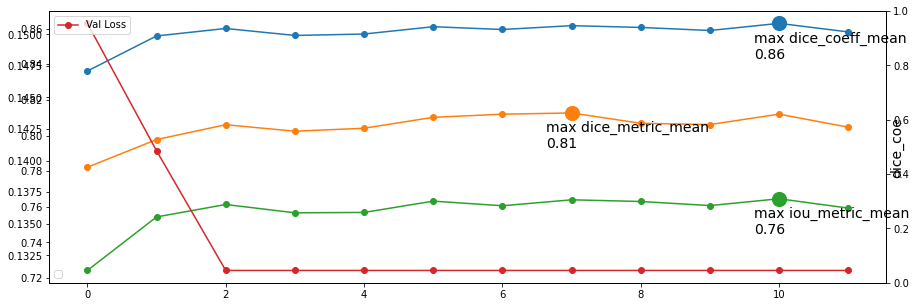

In [100]:
plot_results(metrics)

In [101]:
metrics = pd.read_json(PATH/'36_pytorch_fpn_efficientnet_b6_1536_768_shifted_slices_groupkfold_smooth_fold_1')
metrics

,fold,epoch,best_loss,dice_metric_mean,dice_coeff_mean,iou_metric_mean
0,1,0,0.147627,0.811744,0.873047,0.777428
1,1,1,0.116861,0.858104,0.911163,0.839396
2,1,2,0.116861,0.843938,0.886425,0.800164
3,1,3,0.116861,0.862865,0.911392,0.840531
4,1,4,0.116861,0.866587,0.915774,0.847843
5,1,5,0.107180,0.863346,0.917713,0.851975
6,1,6,0.107180,0.877766,0.923977,0.861454
7,1,7,0.107180,0.876783,0.922870,0.860324
8,1,8,0.107180,0.867548,0.920002,0.856162
9,1,9,0.107180,0.872189,0.920774,0.857031


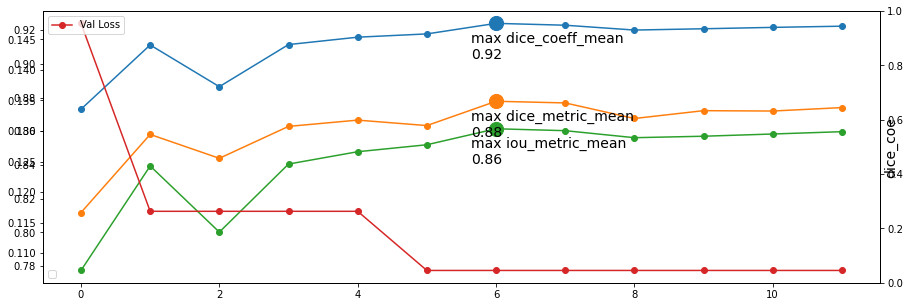

In [102]:
plot_results(metrics)

In [103]:
metrics = pd.read_json(PATH/'36_pytorch_fpn_efficientnet_b6_1536_768_shifted_slices_groupkfold_smooth_fold_2')
metrics

,fold,epoch,best_loss,dice_metric_mean,dice_coeff_mean,iou_metric_mean
0,2,0,0.187546,0.797640,0.868664,0.773697
1,2,1,0.135694,0.838650,0.898304,0.820668
2,2,2,0.135694,0.828290,0.893444,0.812764
3,2,3,0.129834,0.810609,0.879190,0.797028
4,2,4,0.127165,0.847775,0.906404,0.834747
5,2,5,0.122099,0.845493,0.905642,0.832979
6,2,6,0.122099,0.849622,0.907992,0.836861
7,2,7,0.122099,0.845892,0.906876,0.834954
8,2,8,0.122099,0.847438,0.908346,0.837681
9,2,9,0.122099,0.846771,0.906767,0.835264


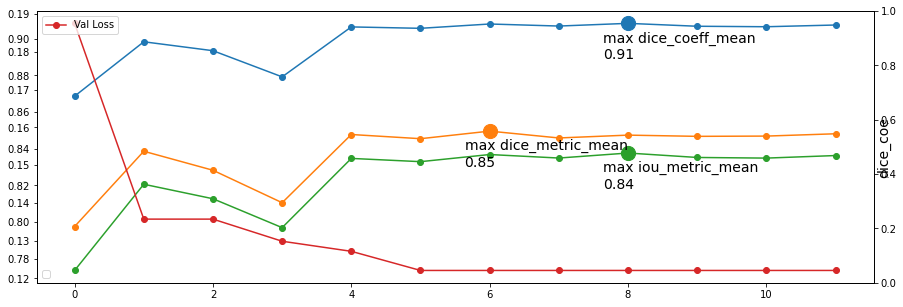

In [104]:
plot_results(metrics)

In [107]:
metrics = pd.read_json(PATH/'36_pytorch_fpn_efficientnet_b6_1536_768_shifted_slices_groupkfold_smooth_fold_3')
metrics

,fold,epoch,best_loss,dice_metric_mean,dice_coeff_mean,iou_metric_mean
0,3,0,0.151382,0.795701,0.851982,0.745967
1,3,1,0.151382,0.813567,0.867128,0.769292
2,3,2,0.135403,0.828499,0.871338,0.776060


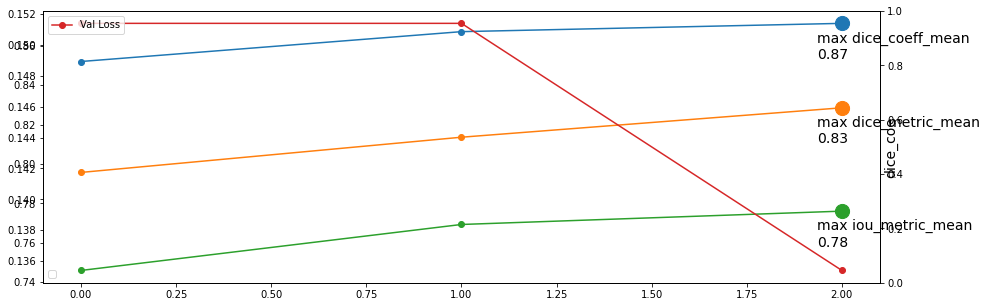

In [108]:
plot_results(metrics)